In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


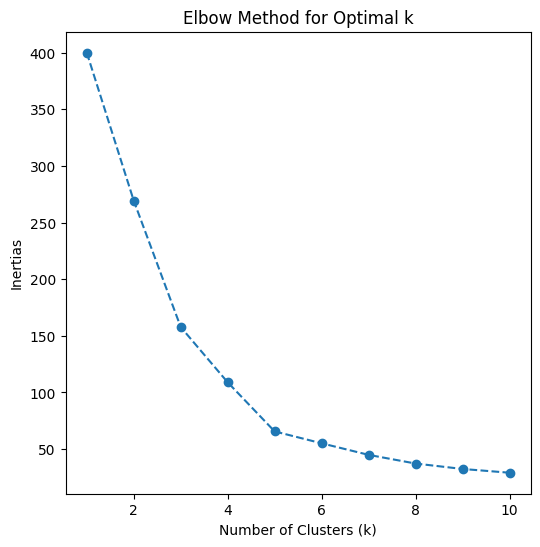

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

path = '/content/drive/MyDrive/Mall_Customers.csv'
df = pd.read_csv(path)
print(df.head())


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using elbow method to determine Optimal cluster
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Elbow curve visualization
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')  # Provide inertias as the second argument
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertias')
plt.show()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        2  
1        4  
2        2  
3        4  
4        2  
5        4  
6        2  
7        4  
8        2  
9        4  


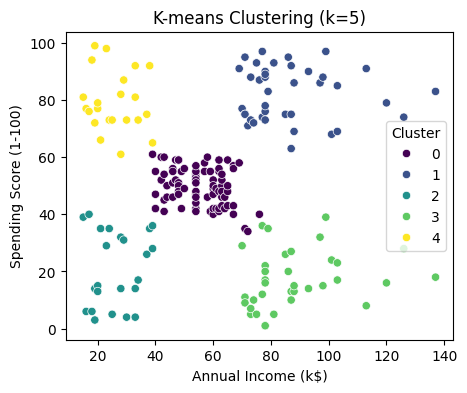

In [5]:
import seaborn as sns
# Based on the elbow method, choose the optimal number of clusters (k)
k = 5
kmeans_optimal = KMeans(n_clusters=k,n_init=10)  # Explicitly set n_init
df['Cluster'] = kmeans_optimal.fit_predict(X_scaled)
print(df.head(10))
# Visualize the clusters
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title(f'K-means Clustering (k={k})')
plt.show()